In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from datetime import date

In [2]:
car = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
car

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


# data preprocessing

In [4]:
car.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

In [6]:
car['Make']=car['Make'].fillna("Not Available")
car['Displacement']=car['Displacement'].fillna(car['Displacement'].median())
car['Cylinders']=car['Cylinders'].fillna(car['Cylinders'].median())
car['Valves_Per_Cylinder']=car['Valves_Per_Cylinder'].fillna(car['Valves_Per_Cylinder'].median())
car['Fuel_Tank_Capacity_litre']=car['Fuel_Tank_Capacity_litre'].fillna(car['Fuel_Tank_Capacity_litre'].median())
car['Height_mm']=car['Height_mm'].fillna(car['Height_mm'].median())
car['Width_mm']=car['Width_mm'].fillna(car['Width_mm'].median())
car['Body_Type']=car['Body_Type'].fillna("Not Available")
car['Doors']=car['Doors'].fillna(car['Doors'].median())
car['City_Mileage_km_litre']=car['City_Mileage_km_litre'].fillna(car['City_Mileage_km_litre'].median())
car['Highway_Mileage_km_litre']=car['Highway_Mileage_km_litre'].fillna(car['Highway_Mileage_km_litre'].median())
# car['Kerb_Weight']=car['Kerb_Weight'].fillna(car['Kerb_Weight'].median())
car['Torque']=car['Torque'].fillna(car['Torque'].median())
car['Seating_Capacity']=car['Seating_Capacity'].fillna(car['Seating_Capacity'].median())
car['Central_Locking']=car['Central_Locking'].fillna("Not Available")
car['Child_Safety_Locks']=car['Child_Safety_Locks'].fillna("Not Available")
car['High_Speed_Alert_System']=car['High_Speed_Alert_System'].fillna("Not Available")
car['ABS_(Anti-lock_Braking_System)']=car['ABS_(Anti-lock_Braking_System)'].fillna("Not Available")
# car['Gross_Vehicle_Weight']=car['Gross_Vehicle_Weight'].fillna(car['Gross_Vehicle_Weight'].median())
car['Airbags']=car['Airbags'].fillna("Not Available")
car['Door_Ajar_Warning']=car['Door_Ajar_Warning'].fillna("Not Available")
car['Fasten_Seat_Belt_Warning']=car['Fasten_Seat_Belt_Warning'].fillna("Not Available")
car['Drive_Modes']=car['Drive_Modes'].fillna("Not Available")
car['Hill_Assist']=car['Hill_Assist'].fillna("Not Available")

In [7]:
car.isnull().sum()

S. No.                              0
Make                                0
Model                               0
Variant                             0
Displacement                        0
Cylinders                           0
Valves_Per_Cylinder                 0
Fuel_Tank_Capacity_litre            0
Fuel_Type                           0
Height_mm                           0
Length_mm                           0
Width_mm                            0
Body_Type                           0
Doors                               0
City_Mileage_km_litre               0
Highway_Mileage_km_litre            0
Kerb_Weight                       365
Power                               0
Torque                              0
Seating_Capacity                    0
Central_Locking                     0
Child_Safety_Locks                  0
Hill_Assist                         0
Drive_Modes                         0
High_Speed_Alert_System             0
ABS_(Anti-lock_Braking_System)      0
Gross_Vehicl

# project1

In [9]:
#TASK1
car[['Body_Type']]

,Body_Type
0,Hatchback
1,Hatchback
2,Hatchback
3,Hatchback
4,Hatchback
...,...
1271,Sedan
1272,Sedan
1273,Sedan
1274,Sedan


In [10]:
bodytype = car.groupby(['Body_Type'])['Body_Type'].count()
bodytype

Body_Type
Convertible             20
Coupe                   41
Coupe, Convertible       1
Crossover               18
Crossover, SUV           2
Hatchback              316
MPV                     39
MUV                     39
Not Available            6
Pick-up                  3
SUV                    447
SUV, Crossover           2
Sedan                  333
Sedan, Coupe             2
Sedan, Crossover         1
Sports                   3
Sports, Convertible      2
Sports, Hatchback        1
Name: Body_Type, dtype: int64

In [11]:
bodytype = bodytype.rename('bodytype_count').reset_index()
bodytype

,Body_Type,bodytype_count
0,Convertible,20
1,Coupe,41
2,"Coupe, Convertible",1
3,Crossover,18
4,"Crossover, SUV",2
5,Hatchback,316
6,MPV,39
7,MUV,39
8,Not Available,6
9,Pick-up,3


In [12]:
sort = bodytype.sort_values('bodytype_count',ascending=False)
sort

,Body_Type,bodytype_count
10,SUV,447
12,Sedan,333
5,Hatchback,316
1,Coupe,41
6,MPV,39
7,MUV,39
0,Convertible,20
3,Crossover,18
8,Not Available,6
15,Sports,3


In [13]:
top_5 = sort.head()
top_5

,Body_Type,bodytype_count
10,SUV,447
12,Sedan,333
5,Hatchback,316
1,Coupe,41
6,MPV,39


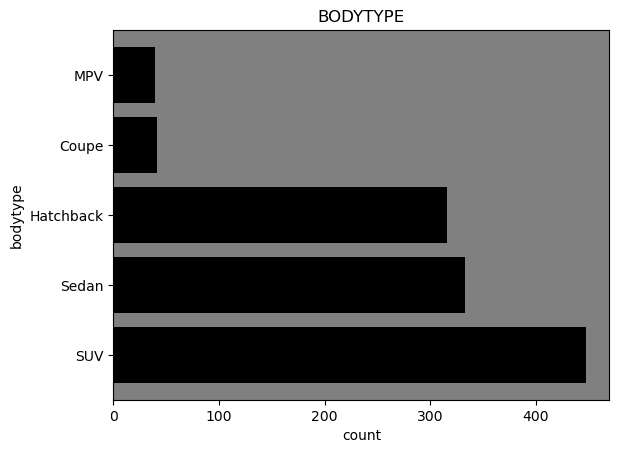

In [14]:
plt.barh(top_5['Body_Type'],top_5['bodytype_count'],color='black')
plt.title('BODYTYPE')
plt.xlabel('count')
plt.ylabel('bodytype')
plt.gca().set_facecolor('grey')
plt.show()

#Interpretation:
#From the above analysis we have found that SUV followed by sedan,hatchback,coupe MPV are the top 5 most preferred car body types among potential customers.

In [16]:
#TASK2
filtered = car.groupby(['Make'])['Drive_Modes'].count().reset_index()
sorted = filtered.sort_values('Drive_Modes',ascending=False)
sorted

,Make,Drive_Modes
24,Maruti Suzuki,149
13,Hyundai,130
23,Mahindra,119
36,Tata,100
37,Toyota,82
31,Not Available,75
12,Honda,64
35,Skoda,43
11,Ford,43
4,Bmw,37


#Interpretation:
#From the above analysis we have identified that Maruti offers a range of driving modes, including normal, comfort, eco, sport, and power followed by Hyundai,Mahindra,Tata and other cars.
#The aim is to determine how many cars currently on the market have all these features.

In [18]:
#TASK3
make = car.loc[::][['Make','City_Mileage_km_litre']]
make

,Make,City_Mileage_km_litre
0,Tata,23.60
1,Tata,23.60
2,Tata,15.29
3,Tata,23.60
4,Tata,23.60
...,...,...
1271,Honda,22.60
1272,Honda,22.60
1273,Honda,18.00
1274,Honda,14.30


In [19]:
sort = make.sort_values('City_Mileage_km_litre',ascending=False)
sort

,Make,City_Mileage_km_litre
688,Mahindra,110.0
689,Mahindra,110.0
687,Mahindra,110.0
616,Mahindra,80.0
615,Mahindra,80.0
...,...,...
873,Ferrari,3.2
872,Ferrari,3.2
876,Lamborghini,3.0
1264,Bentley,2.0


In [20]:
city_mileage = sort.drop_duplicates(subset = 'Make')
city_mileage

,Make,City_Mileage_km_litre
688,Mahindra,110.00
160,Maruti Suzuki,28.40
944,Honda,25.50
21,Renault,25.17
456,Tata,24.12
389,Hyundai,24.00
7,Datsun,21.38
1043,Jaguar,21.27
1224,Fiat,21.20
887,Not Available,20.62


In [21]:
top_10 = city_mileage.head(10)
top_10

,Make,City_Mileage_km_litre
688,Mahindra,110.00
160,Maruti Suzuki,28.40
944,Honda,25.50
21,Renault,25.17
456,Tata,24.12
389,Hyundai,24.00
7,Datsun,21.38
1043,Jaguar,21.27
1224,Fiat,21.20
887,Not Available,20.62


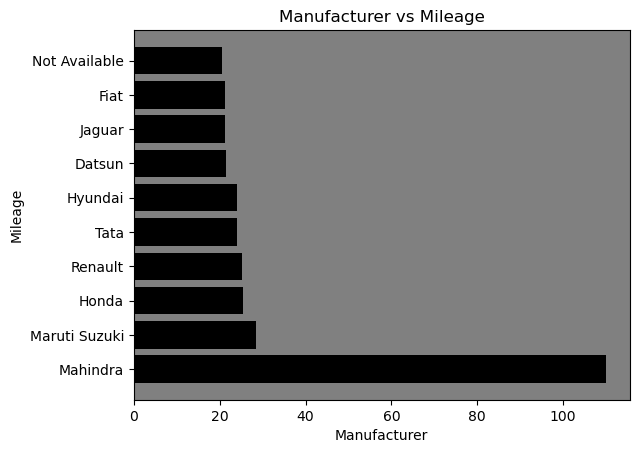

In [22]:
plt.barh(top_10['Make'],top_10['City_Mileage_km_litre'],color='black')
plt.title('Manufacturer vs Mileage')
plt.xlabel('Manufacturer')
plt.ylabel('Mileage')
plt.gca().set_facecolor('grey')
plt.show()

#Interpretation:The top 10 manufacturers based on city mileage and visualized using the barchart and found out that MAHINDRA is in the top position followed by Mahindra SUZUKI,HONDA takes the following positions


In [24]:
#TASK4
fuel = car[(car.Fuel_Type !='Electric')]
fuel

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [25]:
filter=car.loc[0:,['Make','Fuel_Type','City_Mileage_km_litre']]
filter

,Make,Fuel_Type,City_Mileage_km_litre
0,Tata,Petrol,23.60
1,Tata,Petrol,23.60
2,Tata,CNG,15.29
3,Tata,Petrol,23.60
4,Tata,Petrol,23.60
...,...,...,...
1271,Honda,Diesel,22.60
1272,Honda,Diesel,22.60
1273,Honda,Petrol,18.00
1274,Honda,Petrol,14.30


In [26]:
fuelsort = filter.sort_values('City_Mileage_km_litre',ascending = False)
fuelsort

,Make,Fuel_Type,City_Mileage_km_litre
688,Mahindra,Electric,110.0
689,Mahindra,Electric,110.0
687,Mahindra,Electric,110.0
616,Mahindra,Electric,80.0
615,Mahindra,Electric,80.0
...,...,...,...
873,Ferrari,Petrol,3.2
872,Ferrari,Petrol,3.2
876,Lamborghini,Petrol,3.0
1264,Bentley,Petrol,2.0


In [27]:
dup = fuelsort.drop_duplicates(subset = 'Make',keep = 'first')
dup

,Make,Fuel_Type,City_Mileage_km_litre
688,Mahindra,Electric,110.00
160,Maruti Suzuki,Diesel,28.40
944,Honda,Diesel,25.50
21,Renault,Petrol,25.17
456,Tata,Petrol,24.12
389,Hyundai,Diesel,24.00
7,Datsun,Petrol,21.38
1043,Jaguar,Diesel,21.27
1224,Fiat,Diesel,21.20
887,Not Available,Petrol,20.62


In [28]:
top_20 = dup.head(20)
top_20

,Make,Fuel_Type,City_Mileage_km_litre
688,Mahindra,Electric,110.00
160,Maruti Suzuki,Diesel,28.40
944,Honda,Diesel,25.50
21,Renault,Petrol,25.17
456,Tata,Petrol,24.12
389,Hyundai,Diesel,24.00
7,Datsun,Petrol,21.38
1043,Jaguar,Diesel,21.27
1224,Fiat,Diesel,21.20
887,Not Available,Petrol,20.62


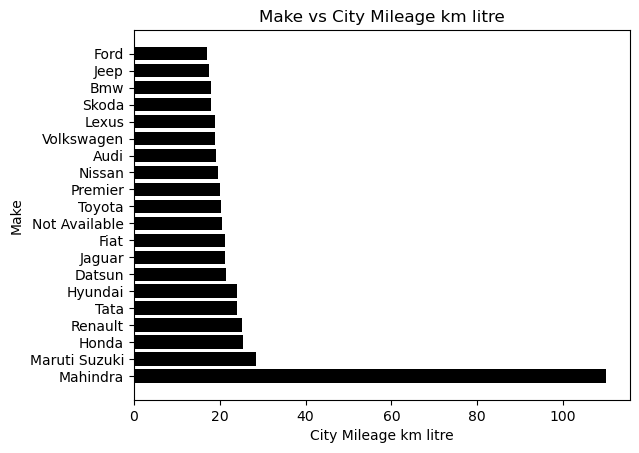

In [29]:
plt.barh(top_20['Make'],top_20['City_Mileage_km_litre'],color='black')
plt.title('Make vs City Mileage km litre')
plt.xlabel('City Mileage km litre')
plt.ylabel('Make')
plt.show()

#Interpretation:
#From the analysis we found out the top 20 non-electric car manufacturers where Mahindra leads the top position followed by Maruti,Honda,Renault and the least manufacturers of non-electric cars are jeep and ford.

In [31]:
#TASK5
car1 = car.loc[::][['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']]
car1

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
0,Tata,23.60,17.19
1,Tata,23.60,17.19
2,Tata,15.29,17.19
3,Tata,23.60,17.19
4,Tata,23.60,17.19
...,...,...,...
1271,Honda,22.60,25.10
1272,Honda,22.60,25.10
1273,Honda,18.00,18.00
1274,Honda,14.30,16.40


In [32]:
hyundai = car1[(car1.Make=='Hyundai')]
hyundai

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
46,Hyundai,15.29,17.19
47,Hyundai,15.29,17.19
48,Hyundai,15.29,17.19
49,Hyundai,15.29,17.19
50,Hyundai,15.29,17.19
...,...,...,...
1132,Hyundai,21.38,17.19
1133,Hyundai,15.29,17.19
1134,Hyundai,15.29,17.19
1135,Hyundai,15.29,17.19


In [33]:
hyundai_pt = pd.pivot_table(hyundai,index = ['Make'],values = ['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc = ['mean','median'])
hyundai_pt

mean                                         median  \
        City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                           
Hyundai                16.017                17.538231                 15.29   

                                  
        Highway_Mileage_km_litre  
Make                              
Hyundai                    17.19

In [34]:
mahindra = car1[(car1.Make=='Mahindra')]
mahindra

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
212,Mahindra,18.00,20.08
213,Mahindra,18.00,20.08
214,Mahindra,18.00,20.08
239,Mahindra,15.29,17.19
240,Mahindra,15.29,17.19
...,...,...,...
1194,Mahindra,12.80,16.21
1195,Mahindra,12.80,16.21
1255,Mahindra,18.00,20.08
1256,Mahindra,18.00,20.08


In [35]:
mahindra_pt = pd.pivot_table(mahindra,index = ['Make'],values = ['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc = ['mean','median'])
mahindra_pt

mean                                         median  \
         City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                            
Mahindra             18.973866                17.645126                  15.5   

                                   
         Highway_Mileage_km_litre  
Make                               
Mahindra                    17.19

In [36]:
renault = car1[(car1.Make=='Renault')]
renault

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
12,Renault,25.17,17.19
13,Renault,25.17,17.19
14,Renault,25.17,17.19
15,Renault,25.17,17.19
16,Renault,25.17,17.19
17,Renault,25.17,17.19
18,Renault,25.17,17.19
19,Renault,25.17,17.19
20,Renault,25.17,17.19
21,Renault,25.17,17.19


In [37]:
renault_pt = pd.pivot_table(renault,index = ['Make'],values = ['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc = ['mean','median'])
renault_pt

mean                                         median  \
        City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                           
Renault             19.384444                   17.315                 21.04   

                                  
        Highway_Mileage_km_litre  
Make                              
Renault                    17.19

In [38]:
skoda = car1[(car1.Make=='Skoda')]
skoda

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre
246,Skoda,11.30,13.70
247,Skoda,15.10,18.19
259,Skoda,15.10,18.19
260,Skoda,15.10,18.19
261,Skoda,15.10,18.19
662,Skoda,18.00,21.72
663,Skoda,12.00,14.84
664,Skoda,18.00,21.13
665,Skoda,12.00,15.41
752,Skoda,10.60,14.12


In [39]:
skoda_pt = pd.pivot_table(skoda,index = ['Make'],values = ['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc = ['mean','median'])
skoda_pt

mean                                         median  \
      City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                         
Skoda             14.357442                17.252093                  15.1   

                                
      Highway_Mileage_km_litre  
Make                            
Skoda                    17.19

In [40]:
#Interpretation:
# By analyzing the mean and median values,

In [41]:
#TASK6
Mean_hyundai=hyundai['City_Mileage_km_litre'].mean()
Mean_hyundai

16.017

In [42]:
Median_hyundai=hyundai['City_Mileage_km_litre'].median()
Mean_hyundai

16.017

In [43]:
Mean_mahindra=mahindra['City_Mileage_km_litre'].mean()
Mean_mahindra

18.973865546218494

In [44]:
Median_mahindra=mahindra['City_Mileage_km_litre'].median()
Median_mahindra

15.5

In [45]:
Mean_renault=renault['City_Mileage_km_litre'].mean()
Mean_renault

19.38444444444444

In [46]:
Median_renault=renault['City_Mileage_km_litre'].median()
Median_renault

21.04

In [47]:
Mean_skoda=skoda['City_Mileage_km_litre'].mean()
Mean_skoda

14.357441860465114

In [48]:
Median_skoda=skoda['City_Mileage_km_litre'].median()
Median_skoda

15.1

In [49]:
measures=pd.DataFrame({"Make":["Hyundai","Renault","Skoda","Mahindra"],"Mean_Values":[Mean_hyundai,Mean_renault,Mean_skoda,Mean_mahindra],"Median_Values":[Median_hyundai,Median_renault,Median_skoda,Median_mahindra]})
measures

,Make,Mean_Values,Median_Values
0,Hyundai,16.017000,15.29
1,Renault,19.384444,21.04
2,Skoda,14.357442,15.10
3,Mahindra,18.973866,15.50


<Axes: title={'center': 'Mean and Median of Citymileages'}, xlabel='Make', ylabel='Measures'>

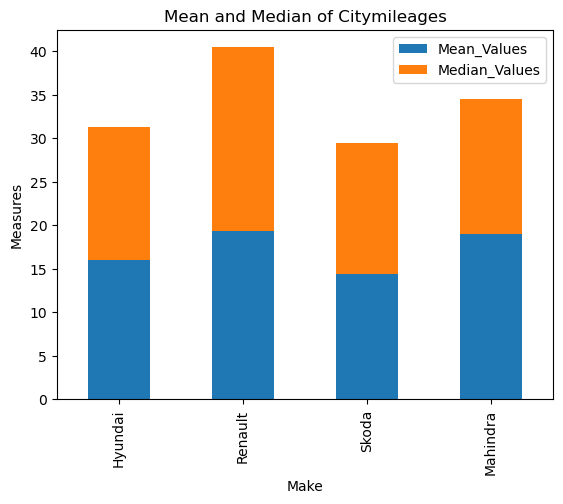

In [50]:
measures.plot(x='Make',
             kind= 'bar',
             stacked = True,
             title = 'Mean and Median of Citymileages',
             xlabel = 'Make',
             ylabel = 'Measures')

#Interpretation:
#The mean and median values of the city mileage for hyundai,mahindra,renault,skoda is calculated and they are visualized using the stacked column chart which makes it more relevant and insightful. 

In [52]:
#TASK7
car.insert(30, "Average Mileage", (car.City_Mileage_km_litre + car.Highway_Mileage_km_litre) / 2)
car

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,16.240
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.850
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.850
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.000
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,15.350


In [53]:
grouped=car.groupby(by="Make")[["Average Mileage"]].mean()
grouped

,Average Mileage
Make,
Aston Martin,9.698333
Audi,14.932419
Bajaj,16.240000
Bentley,8.065000
Bmw,15.637027
Bugatti,16.240000
Datsun,18.845000
Dc,9.000000
Ferrari,9.596250


In [54]:
sorted_avg = grouped.sort_values(by='Average Mileage',ascending= False).reset_index()
sorted_avg

,Make,Average Mileage
0,Datsun,18.845000
1,Maruti Suzuki,18.536309
2,Renault,18.349722
3,Mahindra,18.309496
4,Tata,17.865500
5,Honda,16.969219
6,Fiat,16.914565
7,Volkswagen,16.909853
8,Lexus,16.812000
9,Hyundai,16.777615


Text(0.5, 1.0, 'Average Mileage by Manufacturer')

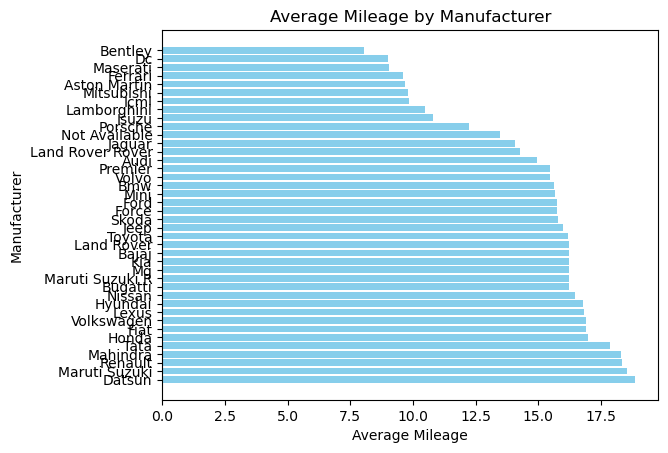

In [55]:
plt.barh(sorted_avg['Make'],sorted_avg['Average Mileage'], color='skyblue')
plt.xlabel('Average Mileage')
plt.ylabel('Manufacturer')
plt.title('Average Mileage by Manufacturer')

#Interpretation:

#We have calculated the average city and highway mileage for each manufacturer and then created a horizontal bar chart to visualize the results, and found out that Datsun has the highest average mileage and Bently has the lowest average mileage.

In [57]:
#TASK8
car.isnull().sum()

S. No.                              0
Make                                0
Model                               0
Variant                             0
Displacement                        0
Cylinders                           0
Valves_Per_Cylinder                 0
Fuel_Tank_Capacity_litre            0
Fuel_Type                           0
Height_mm                           0
Length_mm                           0
Width_mm                            0
Body_Type                           0
Doors                               0
City_Mileage_km_litre               0
Highway_Mileage_km_litre            0
Kerb_Weight                       365
Power                               0
Torque                              0
Seating_Capacity                    0
Central_Locking                     0
Child_Safety_Locks                  0
Hill_Assist                         0
Drive_Modes                         0
High_Speed_Alert_System             0
ABS_(Anti-lock_Braking_System)      0
Gross_Vehicl

In [58]:
disp = car[['Make','Displacement','City_Mileage_km_litre']]
disp

,Make,Displacement,City_Mileage_km_litre
0,Tata,624.0,23.60
1,Tata,624.0,23.60
2,Tata,624.0,15.29
3,Tata,624.0,23.60
4,Tata,624.0,23.60
...,...,...,...
1271,Honda,1498.0,22.60
1272,Honda,1498.0,22.60
1273,Honda,1497.0,18.00
1274,Honda,1497.0,14.30


In [59]:
top_10 = disp.nlargest(10,'City_Mileage_km_litre')
top_10

,Make,Displacement,City_Mileage_km_litre
687,Mahindra,72.0,110.0
688,Mahindra,72.0,110.0
689,Mahindra,72.0,110.0
615,Mahindra,1497.0,80.0
616,Mahindra,1497.0,80.0
155,Maruti Suzuki,1248.0,28.4
157,Maruti Suzuki,1248.0,28.4
159,Maruti Suzuki,1248.0,28.4
160,Maruti Suzuki,1248.0,28.4
164,Maruti Suzuki,1248.0,28.4


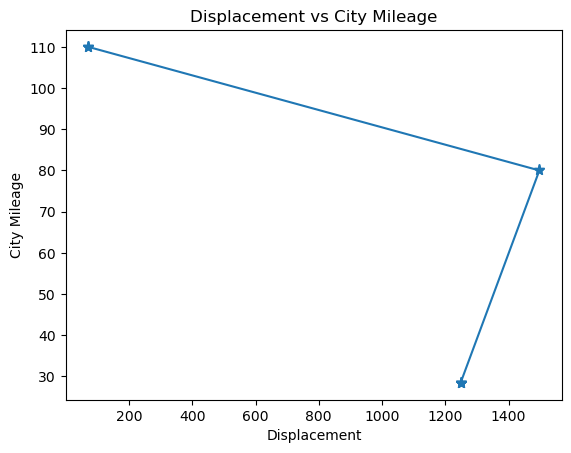

In [60]:
plt.plot(top_10['Displacement'], top_10['City_Mileage_km_litre'],marker='*',ms=8) 
plt.title('Displacement vs City Mileage')
plt.xlabel('Displacement')
plt.ylabel('City Mileage')
plt.show()

#Interpretation:
#The chart illustrates the Displacement (engine size) on the x-axis and City Mileage (fuel efficiency in km per litre) on the y-axis.
#from the linechart, we can observe that City Mileage tends to decrease as Displacement increases.This suggests a negative correlation between the two variables.


In [62]:
#TASK9
HYUNDAI=car[car['Make']=='Hyundai']
HYUNDAI

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
46,46,Hyundai,Santro,Era Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
47,47,Hyundai,Santro,Magna Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
48,48,Hyundai,Santro,Magna Mt Cng,1086.0,4.0,4.0,35.0,CNG,1560.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
49,49,Hyundai,Santro,Magna Amt,1086.0,4.0,4.0,35.0,Petrol,1560.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
50,50,Hyundai,Santro,Sportz Mt,1086.0,4.0,4.0,35.0,Petrol,1560.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,Driver frontal airbag,Yes,Yes,16.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1132,Hyundai,Creta,1.4 Crdi Ex,1396.0,4.0,4.0,55.0,Diesel,1630.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,19.285
1133,1133,Hyundai,Creta,1.6 Vtvt Ex,1591.0,4.0,4.0,55.0,Petrol,1630.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1134,1134,Hyundai,Creta,Sports Edition Petrol,1591.0,4.0,4.0,55.0,Petrol,1630.0,...,Yes,Not Available,Not Available,Yes,Yes,1758 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1135,1135,Hyundai,Creta,Sports Edition Diesel,1582.0,4.0,4.0,55.0,Diesel,1665.0,...,Yes,Not Available,Not Available,Yes,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240


In [63]:
hyundai_fuel=HYUNDAI.loc[:,['Make','Average Mileage']]
hyundai_fuel

,Make,Average Mileage
46,Hyundai,16.240
47,Hyundai,16.240
48,Hyundai,16.240
49,Hyundai,16.240
50,Hyundai,16.240
...,...,...
1132,Hyundai,19.285
1133,Hyundai,16.240
1134,Hyundai,16.240
1135,Hyundai,16.240


(array([ 8.,  0., 84., 12.,  7., 10.,  5.,  2.,  0.,  2.]),
 array([13.125 , 14.2125, 15.3   , 16.3875, 17.475 , 18.5625, 19.65  ,
        20.7375, 21.825 , 22.9125, 24.    ]),
 <BarContainer object of 10 artists>)

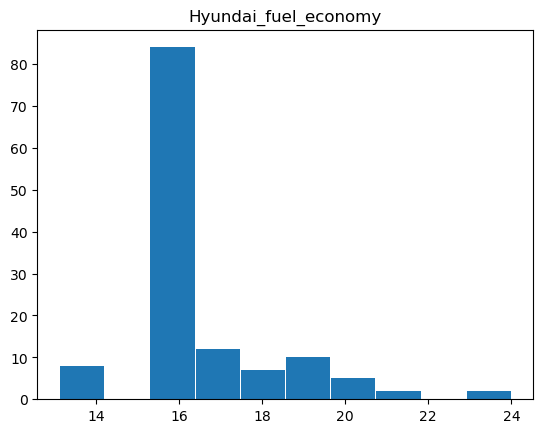

In [64]:
plt.title('Hyundai_fuel_economy')
plt.hist(hyundai_fuel['Average Mileage'],rwidth=0.98)

In [65]:
SUZUKI=car[car['Make']=='Maruti Suzuki']
SUZUKI

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
24,24,Maruti Suzuki,Eeco,5 Str,1196.0,4.0,4.0,40.0,Petrol,1800.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,13.500
25,25,Maruti Suzuki,Eeco,7 Str,1196.0,4.0,4.0,40.0,Petrol,1800.0,...,Yes,Not Available,Normal,Yes,Yes,1540 kg,Driver frontal airbag,Not Available,Not Available,13.500
26,26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,1196.0,4.0,4.0,40.0,Petrol,1800.0,...,Yes,Not Available,Not Available,Not Available,Not Available,1510 kg,Not Available,Not Available,Not Available,13.000
27,27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,1196.0,4.0,4.0,40.0,CNG,1800.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,16.240
28,28,Maruti Suzuki,Eeco,5 Str With Htr Cng,1196.0,4.0,4.0,40.0,CNG,1800.0,...,Yes,Not Available,Normal,Yes,Yes,1510 kg,Driver frontal airbag,Not Available,Not Available,16.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,Maruti Suzuki,Ciaz,1.5L Zeta At Smart Hybrid,1462.0,4.0,4.0,43.0,Petrol,1485.0,...,Yes,Yes,Not Available,Not Available,Yes,1520 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1099,1099,Maruti Suzuki,Ciaz,1.5L Alpha At Smart Hybrid,1462.0,4.0,4.0,43.0,Petrol,1485.0,...,Yes,Yes,Not Available,Not Available,Yes,1520 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1100,1100,Maruti Suzuki,Ciaz,1.5L Alpha,1498.0,4.0,4.0,43.0,Diesel,1485.0,...,Yes,Not Available,Normal,Not Available,Yes,1590 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,22.005
1101,1101,Maruti Suzuki,Ciaz,1.5L Delta,1498.0,4.0,4.0,43.0,Diesel,1485.0,...,Yes,Not Available,Not Available,Not Available,Yes,1590 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.755


In [66]:
suzuki_fuel=SUZUKI.loc[:,['Make','Average Mileage']]
suzuki_fuel

,Make,Average Mileage
24,Maruti Suzuki,13.500
25,Maruti Suzuki,13.500
26,Maruti Suzuki,13.000
27,Maruti Suzuki,16.240
28,Maruti Suzuki,16.240
...,...,...
1098,Maruti Suzuki,16.240
1099,Maruti Suzuki,16.240
1100,Maruti Suzuki,22.005
1101,Maruti Suzuki,21.755


(array([ 5.,  2.,  5., 58.,  8.,  1., 15., 10.,  4., 41.]),
 array([12.5   , 13.5295, 14.559 , 15.5885, 16.618 , 17.6475, 18.677 ,
        19.7065, 20.736 , 21.7655, 22.795 ]),
 <BarContainer object of 10 artists>)

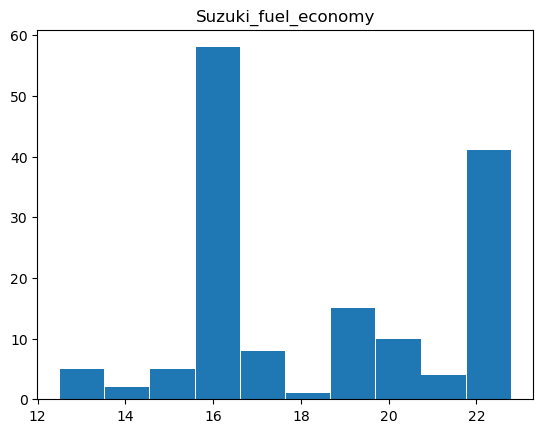

In [67]:
plt.title('Suzuki_fuel_economy')
plt.hist(suzuki_fuel['Average Mileage'],rwidth=0.98)

In [68]:
TATA=car[car['Make']=='Tata']
TATA

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,16.240
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,20.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1141,Tata,Harrier,Revotorq Dark Edition,1956.0,3.0,4.0,50.0,Diesel,1706.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1187,1187,Tata,Tiago Nrg,1.2L Revotron,1199.0,3.0,4.0,35.0,Petrol,1587.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1188,1188,Tata,Tiago Nrg,1.05L Revotorq,1047.0,3.0,4.0,35.0,Diesel,1587.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1189,1189,Tata,Tiago Nrg,1.2L Revotron Amt,1199.0,3.0,4.0,35.0,Petrol,1587.0,...,Yes,Not Available,Not Available,Not Available,Yes,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240


In [69]:
tata_fuel=TATA.loc[:,['Make','Average Mileage']]
tata_fuel

,Make,Average Mileage
0,Tata,20.395
1,Tata,20.395
2,Tata,16.240
3,Tata,20.395
4,Tata,20.395
...,...,...
1141,Tata,16.240
1187,Tata,16.240
1188,Tata,16.240
1189,Tata,16.240


(array([ 3.,  0.,  4., 56.,  4.,  1., 10.,  9.,  0., 13.]),
 array([11.9  , 13.102, 14.304, 15.506, 16.708, 17.91 , 19.112, 20.314,
        21.516, 22.718, 23.92 ]),
 <BarContainer object of 10 artists>)

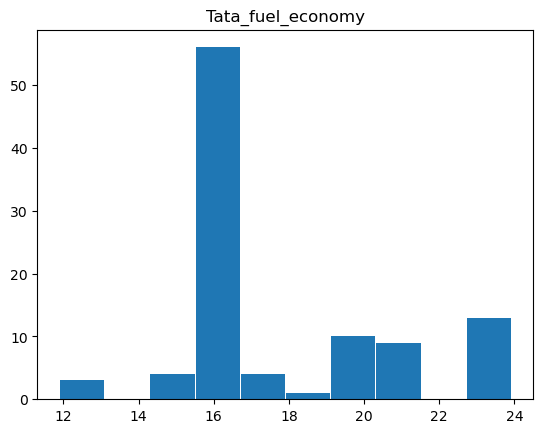

In [70]:
plt.title('Tata_fuel_economy')
plt.hist(tata_fuel['Average Mileage'],rwidth=0.98)

In [71]:
BMW=car[car['Make']=='Bmw']
BMW

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
288,288,Bmw,X3,Xdrive 20D Luxury Line,1995.0,4.0,4.0,67.0,Diesel,1678.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
289,289,Bmw,X3,Xdrive 30I Luxury Line,1998.0,4.0,4.0,67.0,Petrol,1678.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
290,290,Bmw,X3,Xdrive20D Xline,1995.0,4.0,4.0,67.0,Diesel,1678.0,...,Yes,Yes,Not Available,Not Available,Yes,2300 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,17.280
295,295,Bmw,X5,Xdrive30D Sport,2993.0,6.0,4.0,46.0,Diesel,1745.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
296,296,Bmw,X5,Xdrive30D Xline,2993.0,6.0,4.0,46.0,Diesel,1745.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
297,297,Bmw,X5,Xdrive40I M Sport,2998.0,6.0,4.0,46.0,Petrol,1745.0,...,Yes,Yes,Not Available,Not Available,Yes,NaN,"Driver head airbag, Front passenger head airba...",Yes,Yes,16.240
304,304,Bmw,M2 Competition,Coupe,2979.0,6.0,4.0,52.0,Petrol,1410.0,...,Not Available,Not Available,Not Available,Not Available,Yes,2010 kg,"Front passenger knee airbag, Rear passenger he...",Yes,Yes,10.400
315,315,Bmw,7-Series,730Ld Design Pure Excellence,2993.0,6.0,4.0,78.0,Diesel,1479.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980
316,316,Bmw,7-Series,730Ld Design Pure Excellence Signature,2993.0,6.0,4.0,78.0,Diesel,1479.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980
317,317,Bmw,7-Series,730Ld M Sport,2993.0,6.0,4.0,78.0,Diesel,1479.0,...,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2560 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes,14.980


In [72]:
bmw_fuel=BMW.loc[:,['Make','Average Mileage']]
bmw_fuel

,Make,Average Mileage
288,Bmw,17.280
289,Bmw,17.280
290,Bmw,17.280
295,Bmw,16.240
296,Bmw,16.240
297,Bmw,16.240
304,Bmw,10.400
315,Bmw,14.980
316,Bmw,14.980
317,Bmw,14.980


(array([ 1.,  0.,  2.,  1.,  0.,  0.,  4., 23.,  3.,  3.]),
 array([ 6.195 ,  7.5095,  8.824 , 10.1385, 11.453 , 12.7675, 14.082 ,
        15.3965, 16.711 , 18.0255, 19.34  ]),
 <BarContainer object of 10 artists>)

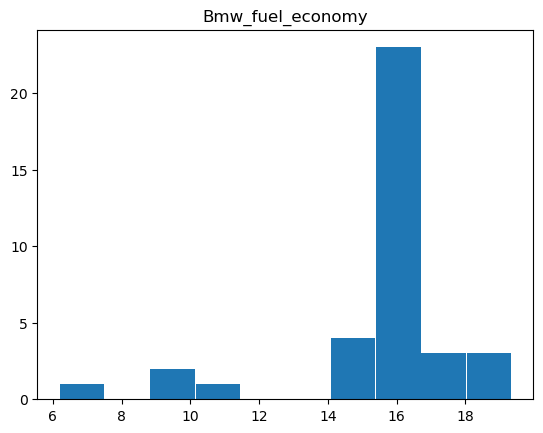

In [73]:
plt.title('Bmw_fuel_economy')
plt.hist(bmw_fuel['Average Mileage'],rwidth=0.98)

In [74]:
from scipy.stats import skew

In [75]:
skewness_hyundai=skew(hyundai_fuel['Average Mileage'])
skewness_hyundai

1.4273193719984483

In [76]:
skewness_suzuki=skew(suzuki_fuel['Average Mileage'])
skewness_suzuki

0.18014616495094246

In [77]:
skewness_tata=skew(tata_fuel['Average Mileage'])
skewness_tata

0.8030518065036729

In [78]:
skewness_Bmw = skew(bmw_fuel['Average Mileage'])
skewness_Bmw

-1.9515286643445837

In [79]:
skewed_data=pd.DataFrame({'Make':['Hyundai','Suzuki','Tata','Bmw'],'Skewness':[1.4273193719984483,0.18014616495094246,0.8030518065036729,-1.9515286643445837]})
skewed_data

,Make,Skewness
0,Hyundai,1.427319
1,Suzuki,0.180146
2,Tata,0.803052
3,Bmw,-1.951529


#Interpretation:From the analysis we interpret that ,BMW has the most skewed mileage distribution, with a significant negative skew, suggesting that BMW's cars have relatively higher city mileage compared to the others.

In [81]:
#TASK10
car_1=car.loc[:,['Valves_Per_Cylinder','Make','Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Kerb_Weight','Power','Torque','Gross_Vehicle_Weight']]
car_1

,Valves_Per_Cylinder,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Kerb_Weight,Power,Torque,Gross_Vehicle_Weight
0,2.0,Tata,624.0,24.0,23.60,17.19,660 kg,38.0,51.0,NaN
1,2.0,Tata,624.0,24.0,23.60,17.19,725 kg,38.0,51.0,NaN
2,2.0,Tata,624.0,15.0,15.29,17.19,710 kg,38.0,51.0,NaN
3,2.0,Tata,624.0,24.0,23.60,17.19,725 kg,38.0,51.0,NaN
4,2.0,Tata,624.0,24.0,23.60,17.19,725 kg,38.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,Honda,1498.0,40.0,22.60,25.10,1170 kg,100.0,200.0,1545 kg
1272,4.0,Honda,1498.0,40.0,22.60,25.10,1175 kg,100.0,200.0,1550 kg
1273,4.0,Honda,1497.0,40.0,18.00,18.00,1107 kg,119.0,145.0,1482 kg
1274,4.0,Honda,1497.0,40.0,14.30,16.40,1080 kg,119.0,145.0,1455 kg


In [82]:
#TASK11
#remove units
car['Kerb_Weight']=car['Kerb_Weight'].str.rstrip('kg kg')
#drop rows having non-numeric values
car = car[~(car['Kerb_Weight'].isin(['1016-1043', '1053-1080']))].astype({'Kerb_Weight': 'float64'})
car['Kerb_Weight']=car['Kerb_Weight'].fillna(car['Kerb_Weight'].median())
# conversion of weight in kg to pounds
car['Kerb_Weight']=2.2*(car['Kerb_Weight'])

In [83]:
car['Gross_Vehicle_Weight']=car['Gross_Vehicle_Weight'].str.rstrip('NAâ€¯ kg')
car['Gross_Vehicle_Weight']=pd.to_numeric(car['Gross_Vehicle_Weight'])
car['Gross_Vehicle_Weight']=car['Gross_Vehicle_Weight'].fillna(car['Gross_Vehicle_Weight'].median())

# conversion of weight in kg to pounds
car['Gross_Vehicle_Weight']=2.2*(car['Gross_Vehicle_Weight'])

In [84]:
car[['Kerb_Weight']]

,Kerb_Weight
0,1452.0
1,1595.0
2,1562.0
3,1595.0
4,1595.0
...,...
1271,2574.0
1272,2585.0
1273,2435.4
1274,2376.0


In [85]:
#TASK12
disp =  car.groupby('Make').agg({'Displacement':['mean', 'median', 'std']})
disp

Displacement                     
                         mean  median          std
Make                                              
Aston Martin      5038.333333  5198.0   986.241519
Audi              2256.354839  1984.0   836.304352
Bajaj              216.000000   216.0     0.000000
Bentley           5447.833333  5974.0  1164.710164
Bmw               2707.918919  2979.0   924.567237
Bugatti           7993.000000  7993.0     0.000000
Datsun            1065.066667  1198.0   179.470836
Dc                2000.000000  2000.0          NaN
Ferrari           4589.500000  3902.0  1125.891647
Fiat              1269.391304  1248.0    65.088568
Force             2447.000000  2596.0   230.829807
Ford              1630.806452  1498.0   729.944446
Honda             1444.875000  1498.0   192.049803
Hyundai           1351.684615  1197.0   270.542350
Icml              1994.000000  1994.0     0.000000
Isuzu             2578.800000  2499.0   455.346242
Jaguar            2679.545455  1999.0  1171.060030
Jeep              2102.357143  1956.0   991.904872
Kia               1635.380952  1493.0   327.485950
Lamborghini       5409.692308  5204.0   703.121064
Land Rover        2795.000000  2993.0   419.529896
Land Rover Rover  3199.703704  2993.0  1183.611092
Lexus             3491.600000  3456.0   990.103047
Mahindra          1715.890756  1497.0   530.998081
Maruti Suzuki     1171.731544  1197.0   188.540147
Maruti Suzuki R   1083.285714   998.0   102.196966
Maserati          3363.888889  2987.0   752.408872
Mg                1653.384615  1500.0   240.514912
Mini              1897.600000  1998.0   211.661785
Mitsubishi        2563.571429  2477.0   284.005785
Nissan            1507.379310  1461.0   454.160247
Not Available     2986.546667  2143.0  1730.112044
Porsche           3062.928571  2995.0   733.485616
Premier           1343.500000  1368.5   161.722911
Renault           1238.583333  1461.0   269.404568
Skoda             1720.581395  1798.0   207.255333
Tata              1399.540000  1248.0   390.015835
Toyota            1803.292683  1496.0   641.799947
Volkswagen        1466.294118  1498.0   310.309282
Volvo             1975.555556  1969.0   138.270078

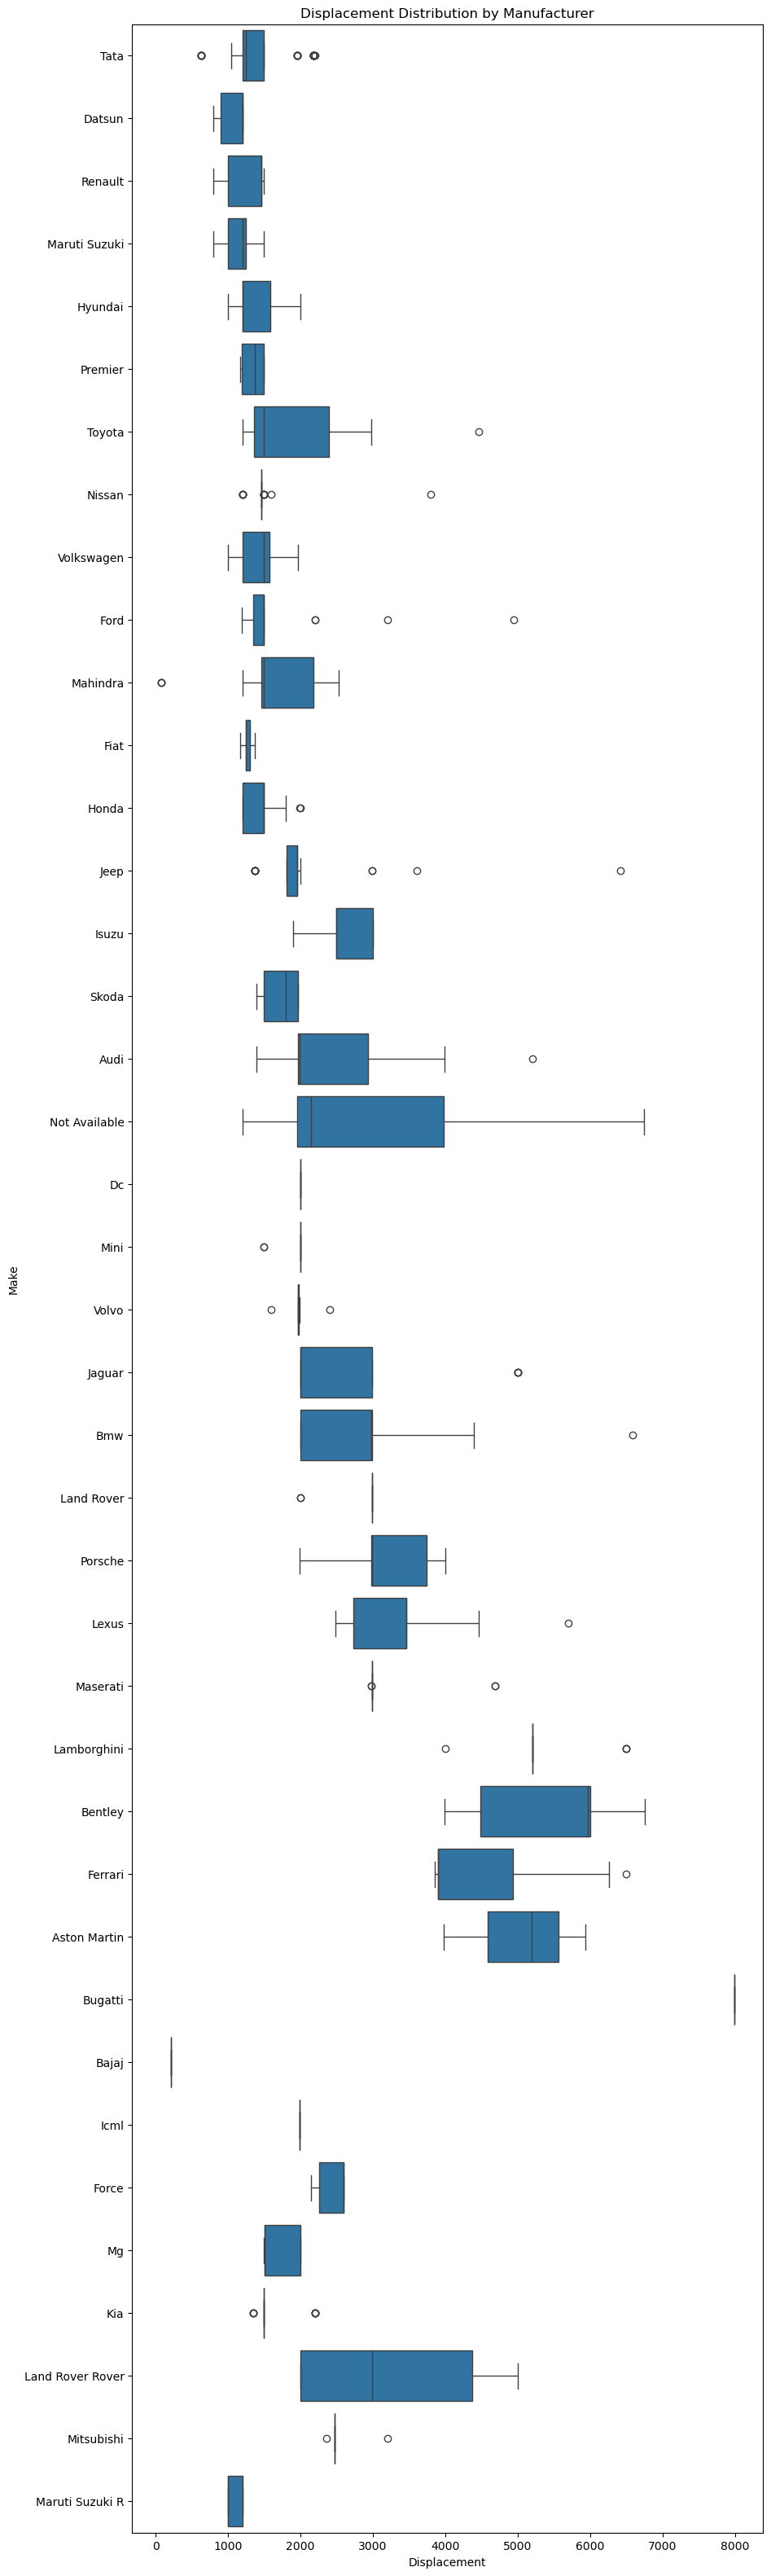

In [86]:
plt.figure(figsize=(10,40))
sns.boxplot(y='Make', x='Displacement', data=car)
plt.title('Displacement Distribution by Manufacturer')
plt.show()

In [87]:
cyl = car.groupby('Make')[['Cylinders']].agg(['mean','median','std'])

In [88]:
valves_per_cyl = car.groupby('Make')[['Valves_Per_Cylinder']].agg(['mean','median','std'])
valves_per_cyl

Valves_Per_Cylinder                 
                                mean median       std
Make                                                 
Aston Martin                4.000000    4.0  0.000000
Audi                        4.774194    4.0  2.996772
Bajaj                       1.000000    1.0  0.000000
Bentley                     4.000000    4.0  0.000000
Bmw                         4.000000    4.0  0.000000
Bugatti                     4.000000    4.0  0.000000
Datsun                      4.000000    4.0  0.000000
Dc                          4.000000    4.0       NaN
Ferrari                     4.000000    4.0  0.000000
Fiat                        4.000000    4.0  0.000000
Force                       4.000000    4.0  0.000000
Ford                        4.000000    4.0  0.000000
Honda                       4.000000    4.0  0.000000
Hyundai                     4.000000    4.0  0.000000
Icml                        4.000000    4.0  0.000000
Isuzu                       4.000000    4.0  0.000000
Jaguar                      4.000000    4.0  0.000000
Jeep                        4.000000    4.0  0.000000
Kia                         4.000000    4.0  0.000000
Lamborghini                 4.307692    4.0  1.109400
Land Rover                  4.000000    4.0  0.000000
Land Rover Rover            3.703704    4.0  0.724028
Lexus                       4.800000    4.0  1.686548
Mahindra                    3.747899    4.0  0.653783
Maruti Suzuki               3.973154    4.0  0.230930
Maruti Suzuki R             4.000000    4.0  0.000000
Maserati                    4.000000    4.0  0.000000
Mg                          4.000000    4.0  0.000000
Mini                        4.000000    4.0  0.000000
Mitsubishi                  3.428571    4.0  0.975900
Nissan                      5.172414    4.0  2.904048
Not Available               4.026667    4.0  0.230940
Porsche                     4.000000    4.0  0.000000
Premier                     4.000000    4.0  0.000000
Renault                     4.000000    4.0  0.000000
Skoda                       4.000000    4.0  0.000000
Tata                        3.880000    4.0  0.477367
Toyota                      3.634146    4.0  0.777971
Volkswagen                  3.882353    4.0  0.477665
Volvo                       4.000000    4.0  0.000000

#Interpretation:BMW and similar high-performance brands likely have larger engine displacements, more cylinders, and advanced valve configurations, indicating a focus on powerful, high-performance cars.
#Manufacturers like Toyota or Hyundai might focus on smaller engines, fewer cylinders, and simpler valve designs, which are optimized for fuel efficiency and affordability.
#Manufacturers with higher variability in cylinders and valves per cylinder (e.g., Ford or General Motors) may offer a broad range of vehicles catering to different customer needs, from compact city cars to larger SUVs and trucks.

In [90]:
#TASK13
RENAULT=car[car.Make=="Renault"]
RENAULT

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
12,12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
13,13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Not Available,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Not Available,Yes,21.180
14,14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
15,15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
16,16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
17,17,Renault,Kwid,Climber 1.0 Mt,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
18,18,Renault,Kwid,Rxt Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
19,19,Renault,Kwid,Climber Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,Driver frontal airbag,Yes,Yes,21.180
20,20,Renault,Kwid,Rxt (O) 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.180
21,21,Renault,Kwid,Rxt (O) Amt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.180


In [91]:
TOYATO=car[car.Make=="Toyota"]
TOYATO

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
87,87,Toyota,Etios Liva,G,1197.0,4.0,4.0,45.0,Petrol,1510.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.405
88,88,Toyota,Etios Liva,V,1197.0,4.0,4.0,45.0,Petrol,1510.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.630
89,89,Toyota,Etios Liva,Gd,1364.0,4.0,2.0,45.0,Diesel,1510.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.945
90,90,Toyota,Etios Liva,Vx,1197.0,4.0,4.0,45.0,Petrol,1510.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.405
91,91,Toyota,Etios Liva,Vxd,1364.0,4.0,2.0,45.0,Diesel,1510.0,...,Yes,Not Available,Not Available,Not Available,Yes,3245.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,21.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1234,Toyota,Yaris,J (O),1496.0,4.0,4.0,42.0,Petrol,1495.0,...,Yes,Not Available,Normal,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1235,1235,Toyota,Yaris,G (O),1496.0,4.0,4.0,42.0,Petrol,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger side ai...",Yes,Yes,16.240
1236,1236,Toyota,Yaris,J (O) Cvt,1496.0,4.0,4.0,42.0,Petrol,1495.0,...,Yes,Not Available,Normal,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,16.240
1237,1237,Toyota,Yaris,G (O) Cvt,1496.0,4.0,4.0,42.0,Petrol,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3476.0,"Driver frontal airbag, Front passenger side ai...",Yes,Yes,16.240


In [92]:
HONDA=car[car.Make=="Honda"]
HONDA

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Average Mileage
227,227,Honda,Jazz,V Petrol,1199.0,4.0,4.0,40.0,Petrol,1544.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
228,228,Honda,Jazz,Vx Cvt,1199.0,4.0,4.0,40.0,Petrol,1544.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
229,229,Honda,Jazz,Vx Petrol,1199.0,4.0,4.0,40.0,Petrol,1544.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
230,230,Honda,Jazz,V Cvt,1199.0,4.0,4.0,40.0,Petrol,1544.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,14.245
231,231,Honda,Jazz,S Diesel,1498.0,4.0,4.0,40.0,Diesel,1544.0,...,Yes,Not Available,Not Available,Not Available,Yes,3850.0,"Driver frontal airbag, Front passenger frontal...",Yes,Not Available,14.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1270,Honda,City,V Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3350.6,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,24.100
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3399.0,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.850
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3410.0,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.850
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Not Available,Not Available,Yes,Yes,3260.4,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.000


In [93]:
RENAULT_SEP=RENAULT.loc[:,["Displacement","Power","Torque","Average Mileage"]]
RENAULT_SEP

,Displacement,Power,Torque,Average Mileage
12,799.0,54.0,72.0,21.180
13,799.0,54.0,72.0,21.180
14,799.0,54.0,72.0,21.180
15,799.0,54.0,72.0,21.180
16,999.0,68.0,91.0,21.180
17,999.0,68.0,91.0,21.180
18,999.0,68.0,91.0,21.180
19,999.0,68.0,91.0,21.180
20,999.0,68.0,91.0,21.180
21,999.0,68.0,91.0,21.180


In [94]:
RENAULT_CORR = RENAULT_SEP.corr()
RENAULT_CORR

,Displacement,Power,Torque,Average Mileage
Displacement,1.000000,0.907051,0.863249,-0.580795
Power,0.907051,1.000000,0.832148,-0.648812
Torque,0.863249,0.832148,1.000000,-0.299752
Average Mileage,-0.580795,-0.648812,-0.299752,1.000000


In [95]:
TOYATO_SEP=TOYATO.loc[:,["Displacement","Power","Torque","Average Mileage"]]
TOYATO_SEP

,Displacement,Power,Torque,Average Mileage
87,1197.0,80.0,104.0,16.405
88,1197.0,80.0,104.0,16.630
89,1364.0,68.0,170.0,21.945
90,1197.0,80.0,104.0,16.405
91,1364.0,68.0,170.0,21.690
...,...,...,...,...
1234,1496.0,107.0,140.0,16.240
1235,1496.0,107.0,140.0,16.240
1236,1496.0,107.0,140.0,16.240
1237,1496.0,107.0,140.0,16.240


In [96]:
TOYATO_CORR=TOYATO_SEP.corr()
TOYATO_CORR

,Displacement,Power,Torque,Average Mileage
Displacement,1.000000,0.956218,0.915263,-0.713264
Power,0.956218,1.000000,0.835299,-0.818057
Torque,0.915263,0.835299,1.000000,-0.529686
Average Mileage,-0.713264,-0.818057,-0.529686,1.000000


In [97]:
HONDA_SEP=HONDA.loc[:,["Displacement","Power","Torque","Average Mileage"]]
HONDA_SEP

,Displacement,Power,Torque,Average Mileage
227,1199.0,90.0,110.0,14.245
228,1199.0,90.0,110.0,14.245
229,1199.0,90.0,110.0,14.245
230,1199.0,90.0,110.0,14.245
231,1498.0,100.0,200.0,14.595
...,...,...,...,...
1270,1498.0,100.0,200.0,24.100
1271,1498.0,100.0,200.0,23.850
1272,1498.0,100.0,200.0,23.850
1273,1497.0,119.0,145.0,18.000


In [98]:
HONDA_CORR=HONDA_SEP.corr()
HONDA_CORR

,Displacement,Power,Torque,Average Mileage
Displacement,1.000000,0.833711,0.645744,0.196671
Power,0.833711,1.000000,0.371133,-0.072206
Torque,0.645744,0.371133,1.000000,0.295702
Average Mileage,0.196671,-0.072206,0.295702,1.000000


                 Displacement     Power    Torque  Average Mileage
Displacement         1.000000  0.956218  0.915263        -0.713264
Power                0.956218  1.000000  0.835299        -0.818057
Torque               0.915263  0.835299  1.000000        -0.529686
Average Mileage     -0.713264 -0.818057 -0.529686         1.000000
---------------------------------------------------


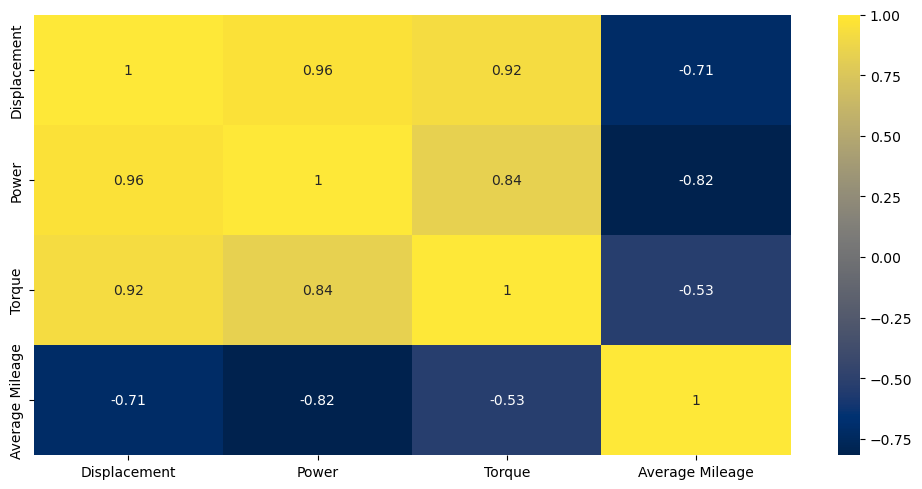

In [100]:
f=TOYATO[(TOYATO['Make']=='Toyota')|(RENAULT['Make']=='Renault')|(HONDA['Make']=='Honda')]
f

cor=f[['Displacement','Power','Torque','Average Mileage']].corr()
print(cor)
print("---------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='cividis')
plt.tight_layout()
plt.show()

#Interpretation:Through this analysis, we conclude that car manufacturers that focus on larger engines or more powerful configurations (e.g., higher Power and Torque) typically sacrifice fuel efficiency, leading to lower Average Mileage.

In [103]:
#TASK14
fil = car.loc[:,['Make','Kerb_Weight','Gross_Vehicle_Weight']]
fil

,Make,Kerb_Weight,Gross_Vehicle_Weight
0,Tata,1452.0,3850.0
1,Tata,1595.0,3850.0
2,Tata,1562.0,3850.0
3,Tata,1595.0,3850.0
4,Tata,1595.0,3850.0
...,...,...,...
1271,Honda,2574.0,3399.0
1272,Honda,2585.0,3410.0
1273,Honda,2435.4,3260.4
1274,Honda,2376.0,3201.0


In [105]:
car_df = car.groupby(by = 'Make')[['Kerb_Weight','Gross_Vehicle_Weight']].agg(['mean','median','std'])
car_df

Kerb_Weight                      Gross_Vehicle_Weight  \
                         mean  median          std                 mean   
Make                                                                      
Aston Martin      3813.333333  3696.0   516.102057          4092.733333   
Audi              3982.000000  3916.0   753.233651          5002.161290   
Bajaj             2712.600000  2712.6     0.000000          3850.000000   
Bentley           5407.233333  5335.0   268.974331          6744.466667   
Bmw               3315.756757  3498.0   565.980023          4454.108108   
Bugatti           4389.000000  4389.0     0.000000          3850.000000   
Datsun            2225.520000  1900.8   411.657734          3850.000000   
Dc                3476.000000  3476.0          NaN          3476.000000   
Ferrari           3594.250000  3470.5   449.627703          3850.000000   
Fiat              2648.226087  2673.0   113.779505          3621.869565   
Force             2712.600000  2712.6     0.000000          5159.000000   
Ford              2789.245161  2695.0   787.976634          3791.451613   
Honda             2475.137500  2424.4   341.243991          3304.468750   
Hyundai           2616.392308  2712.6   260.989929          3580.686154   
Icml              3778.800000  3762.0    28.773321          5442.000000   
Isuzu             3643.640000  4257.0   849.966804          4259.200000   
Jaguar            3665.500000  3747.7   444.079009          4638.400000   
Jeep              3718.471429  3436.4   714.428864          4228.242857   
Kia               2712.600000  2712.6     0.000000          3850.000000   
Lamborghini       3262.600000  3128.4   531.638091          3850.000000   
Land Rover        3088.360000  2712.6   792.171636          3850.000000   
Land Rover Rover  4537.948148  4694.8  1160.840748          5827.555556   
Lexus             4801.940000  4944.5   752.342854          5874.000000   
Mahindra          3153.672269  2712.6   615.131564          4463.855462   
Maruti Suzuki     2066.110067  2013.0   346.741012          3223.295302   
Maruti Suzuki R   2585.942857  2712.6   321.956838          3721.142857   
Maserati          3645.644444  3982.0   710.942556          4405.622222   
Mg                2712.600000  2712.6     0.000000          3850.000000   
Mini              2944.040000  2744.5   492.106337          3841.200000   
Mitsubishi        4311.057143  4257.0   473.287886          5742.000000   
Nissan            2750.379310  2712.6   285.327162          3834.524138   
Not Available     3810.752000  3487.0  1136.753470          4872.765333   
Porsche           4070.942857  4103.0  1035.479788          4709.571429   
Premier           2471.333333  2519.0    73.844882          3366.000000   
Renault           2298.572222  2712.6   639.360776          3752.161111   
Skoda             2960.841860  2948.0   372.176373          4085.604651   
Tata              2756.512000  2712.6   840.558270          3800.192000   
Toyota            2761.295122  2420.0   883.742956          4124.731707   
Volkswagen        2653.717647  2525.6   436.796021          3670.764706   
Volvo             4372.500000  3658.6  1585.123013          4209.455556   

                                       
                  median          std  
Make                                   
Aston Martin      3850.0   420.426466  
Audi              4807.0   870.553314  
Bajaj             3850.0     0.000000  
Bentley           6789.2   443.500939  
Bmw               3850.0   769.888151  
Bugatti           3850.0     0.000000  
Datsun            3850.0     0.000000  
Dc                3476.0          NaN  
Ferrari           3850.0     0.000000  
Fiat              3850.0   713.823782  
Force             5522.0  1046.931898  
Ford              3850.0    77.957184  
Honda             3850.0   675.411769  
Hyundai           3850.0   489.856872  
Icml              5412.0    51.380930  
Isuzu             3850.0   560.805849  
Jaguar            4818.0   628.1

In [107]:
car_df.insert(3,'CV',(car_df['Kerb_Weight']['std']/car_df['Kerb_Weight']['mean'])*100)

In [109]:
car_df.insert(7,'gross_CV',(car_df['Gross_Vehicle_Weight']['std']/car_df['Gross_Vehicle_Weight']['mean'])*100)

In [111]:
car_df

Kerb_Weight                              CV  \
                         mean  median          std              
Make                                                            
Aston Martin      3813.333333  3696.0   516.102057  13.534145   
Audi              3982.000000  3916.0   753.233651  18.915963   
Bajaj             2712.600000  2712.6     0.000000   0.000000   
Bentley           5407.233333  5335.0   268.974331   4.974343   
Bmw               3315.756757  3498.0   565.980023  17.069407   
Bugatti           4389.000000  4389.0     0.000000   0.000000   
Datsun            2225.520000  1900.8   411.657734  18.497148   
Dc                3476.000000  3476.0          NaN        NaN   
Ferrari           3594.250000  3470.5   449.627703  12.509639   
Fiat              2648.226087  2673.0   113.779505   4.296442   
Force             2712.600000  2712.6     0.000000   0.000000   
Ford              2789.245161  2695.0   787.976634  28.250533   
Honda             2475.137500  2424.4   341.243991  13.786870   
Hyundai           2616.392308  2712.6   260.989929   9.975183   
Icml              3778.800000  3762.0    28.773321   0.761441   
Isuzu             3643.640000  4257.0   849.966804  23.327409   
Jaguar            3665.500000  3747.7   444.079009  12.115101   
Jeep              3718.471429  3436.4   714.428864  19.212972   
Kia               2712.600000  2712.6     0.000000   0.000000   
Lamborghini       3262.600000  3128.4   531.638091  16.294921   
Land Rover        3088.360000  2712.6   792.171636  25.650236   
Land Rover Rover  4537.948148  4694.8  1160.840748  25.580741   
Lexus             4801.940000  4944.5   752.342854  15.667477   
Mahindra          3153.672269  2712.6   615.131564  19.505247   
Maruti Suzuki     2066.110067  2013.0   346.741012  16.782311   
Maruti Suzuki R   2585.942857  2712.6   321.956838  12.450269   
Maserati          3645.644444  3982.0   710.942556  19.501149   
Mg                2712.600000  2712.6     0.000000   0.000000   
Mini              2944.040000  2744.5   492.106337  16.715341   
Mitsubishi        4311.057143  4257.0   473.287886  10.978465   
Nissan            2750.379310  2712.6   285.327162  10.374102   
Not Available     3810.752000  3487.0  1136.753470  29.830161   
Porsche           4070.942857  4103.0  1035.479788  25.435871   
Premier           2471.333333  2519.0    73.844882   2.988058   
Renault           2298.572222  2712.6   639.360776  27.815562   
Skoda             2960.841860  2948.0   372.176373  12.569951   
Tata              2756.512000  2712.6   840.558270  30.493547   
Toyota            2761.295122  2420.0   883.742956  32.004654   
Volkswagen        2653.717647  2525.6   436.796021  16.459778   
Volvo             4372.500000  3658.6  1585.123013  36.252099   

                 Gross_Vehicle_Weight                        gross_CV  
                                 mean  median          std             
Make                                                                   
Aston Martin              4092.733333  3850.0   420.426466  10.272511  
Audi                      5002.161290  4807.0   870.553314  17.403543  
Bajaj                     3850.000000  3850.0     0.000000   0.000000  
Bentley                   6744.466667  6789.2   443.500939   6.575775  
Bmw                       4454.108108  3850.0   769.888151  17.284900  
Bugatti                   3850.000000  3850.0     0.000000   0.000000  
Datsun                    3850.000000  3850.0     0.000000   0.000000  
Dc                        3476.000000  3476.0          NaN        NaN  
Ferrari                   3850.000000  3850.0     0.000000   0.000000  
Fiat                      3621.869565  3850.0   713.823782  19.708710  
Force                     5159.000000  5522.0  1046.931898  20.293311  
Ford                      3791.451613  3850.0    77.957184   2.056130  
Honda                     3304.468750  3850.0   675.411769  20.439345  
Hyundai                   3580.686154  3850.0   489.856872  13.680531 

#Interpretation:The mean, median, standard deviation, and CV metrics together offer a comprehensive view of the weight characteristics of vehicles for each manufacturer. The CV is particularly useful for comparing the relative variability in weight across manufacturers.
#Manufacturers with high CV values (for both Kerb Weight and Gross Vehicle Weight) have more diverse vehicle offerings with a wide range of weights, while manufacturers with lower CV values offer more consistent vehicle weights.

# project2

In [114]:
#TASK1
filtered_car=car.loc[:,['ABS_(Anti-lock_Braking_System)','Airbags','Hill_Assist']]
filtered_car

,ABS_(Anti-lock_Braking_System),Airbags,Hill_Assist
0,Not Available,Not Available,Not Available
1,Not Available,Not Available,Not Available
2,Not Available,Not Available,Yes
3,Not Available,Not Available,Not Available
4,Not Available,Not Available,Not Available
...,...,...,...
1271,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available
1272,Yes,"Drive side airbag, Curtain airbags, Driver fro...",Not Available
1273,Yes,"Curtain airbags, Driver frontal airbag, Front ...",Not Available
1274,Yes,"Driver frontal airbag, Front passenger frontal...",Not Available


In [116]:
#TASK2
car.loc[:,['Model','Seating_Capacity','Central_Locking','Child_Safety_Locks']]

,Model,Seating_Capacity,Central_Locking,Child_Safety_Locks
0,Nano Genx,4.0,Yes,Yes
1,Nano Genx,4.0,Not Available,Yes
2,Nano Genx,4.0,Not Available,Yes
3,Nano Genx,4.0,Yes,Yes
4,Nano Genx,4.0,Not Available,Yes
...,...,...,...,...
1271,City,5.0,Yes,Yes
1272,City,5.0,Yes,Yes
1273,City,5.0,Yes,Yes
1274,City,5.0,Yes,Yes


In [118]:
average_seating_capacity = car.groupby('Model')[['Seating_Capacity']].mean()
average_seating_capacity

,Seating_Capacity
Model,
718,2.0
911,4.0
3-Series,5.0
458 Speciale,2.0
458 Spider,2.0
...,...
Xylo,7.2
Yaris,5.0
Z4 Roadster,2.0


In [120]:
central_locking_count = car.groupby('Model')[['Central_Locking']].count()
central_locking_count

,Central_Locking
Model,
718,2
911,2
3-Series,3
458 Speciale,1
458 Spider,1
...,...
Xylo,5
Yaris,14
Z4 Roadster,2


In [122]:
child_safety_locks_count = car.groupby('Model')[['Child_Safety_Locks']].count()
child_safety_locks_count

,Child_Safety_Locks
Model,
718,2
911,2
3-Series,3
458 Speciale,1
458 Spider,1
...,...
Xylo,5
Yaris,14
Z4 Roadster,2


In [124]:
#TASK3
#filter the dataset
new_df = car[['Make','High_Speed_Alert_System','Fasten_Seat_Belt_Warning','Door_Ajar_Warning']]
new_df

,Make,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning
0,Tata,Not Available,Not Available,Not Available
1,Tata,Not Available,Not Available,Not Available
2,Tata,Not Available,Not Available,Not Available
3,Tata,Not Available,Not Available,Not Available
4,Tata,Not Available,Not Available,Not Available
...,...,...,...,...
1271,Honda,Yes,Yes,Yes
1272,Honda,Yes,Yes,Yes
1273,Honda,Yes,Yes,Yes
1274,Honda,Yes,Yes,Yes


In [126]:
#replace no with 0 and yes with 1
new_df['High_Speed_Alert_System'] = new_df['High_Speed_Alert_System'].replace({'Yes':1,'Not Available':0})
new_df['High_Speed_Alert_System']

0       0
1       0
2       0
3       0
4       0
       ..
1271    1
1272    1
1273    1
1274    1
1275    0
Name: High_Speed_Alert_System, Length: 1264, dtype: int64

In [128]:
new_df['Fasten_Seat_Belt_Warning'] = new_df['Fasten_Seat_Belt_Warning'].replace({'Yes':1,'Not Available':0})
new_df['Fasten_Seat_Belt_Warning']

0       0
1       0
2       0
3       0
4       0
       ..
1271    1
1272    1
1273    1
1274    1
1275    1
Name: Fasten_Seat_Belt_Warning, Length: 1264, dtype: int64

In [130]:
new_df['Door_Ajar_Warning'] = new_df['Door_Ajar_Warning'].replace({'Yes':1,'Not Available':0})
new_df['Door_Ajar_Warning']

0       0
1       0
2       0
3       0
4       0
       ..
1271    1
1272    1
1273    1
1274    1
1275    1
Name: Door_Ajar_Warning, Length: 1264, dtype: int64

In [132]:
new_df['Total_score'] = new_df['High_Speed_Alert_System']+new_df['Fasten_Seat_Belt_Warning']+new_df['Door_Ajar_Warning']
new_df['Total_score']

0       0
1       0
2       0
3       0
4       0
       ..
1271    3
1272    3
1273    3
1274    3
1275    2
Name: Total_score, Length: 1264, dtype: int64

In [134]:
new_df

,Make,High_Speed_Alert_System,Fasten_Seat_Belt_Warning,Door_Ajar_Warning,Total_score
0,Tata,0,0,0,0
1,Tata,0,0,0,0
2,Tata,0,0,0,0
3,Tata,0,0,0,0
4,Tata,0,0,0,0
...,...,...,...,...,...
1271,Honda,1,1,1,3
1272,Honda,1,1,1,3
1273,Honda,1,1,1,3
1274,Honda,1,1,1,3


In [136]:
#TASK4
FILTER = car[['Make','Height_mm','Length_mm','Width_mm']]
FILTER

,Make,Height_mm,Length_mm,Width_mm
0,Tata,1652.0,3164.0,1750.0
1,Tata,1652.0,3164.0,1750.0
2,Tata,1652.0,3164.0,1750.0
3,Tata,1652.0,3164.0,1750.0
4,Tata,1652.0,3164.0,1750.0
...,...,...,...,...
1271,Honda,1495.0,4440.0,1695.0
1272,Honda,1495.0,4440.0,1695.0
1273,Honda,1495.0,4440.0,1695.0
1274,Honda,1495.0,4440.0,1695.0


In [138]:
avg_summary = pd.pivot_table(FILTER,index ='Make',values =['Height_mm','Length_mm','Width_mm'],aggfunc ='mean')
avg_summary

,Height_mm,Length_mm,Width_mm
Make,,,
Aston Martin,1294.333333,4623.000000,1982.333333
Audi,1543.612903,4715.096774,1875.838710
Bajaj,1652.000000,2752.000000,1312.000000
Bentley,1563.666667,5210.166667,2140.666667
Bmw,1541.486486,4816.891892,1980.243243
Bugatti,1212.000000,4544.000000,2038.000000
Datsun,1520.600000,3644.400000,1605.600000
Dc,1200.000000,4565.000000,2120.000000
Ferrari,1275.250000,4668.125000,1956.000000
